<a href="https://colab.research.google.com/github/Tanishq-Choudhary/Tanishq-Choudhary-23FE10CSE00664-ML-Lab-Sem-6/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LAB 2**

---


Section: J2
Name: Tanishq Choudhary
Reg No: 23FE10CSE00664

Import packages and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Parse the dataset. I am parsing from github to ensure globally available

In [2]:
url = "https://raw.githubusercontent.com/Tanishq-Choudhary/Tanishq-Choudhary-23FE10CSE00664-ML-Lab-Sem-6/main/data/USA_Housing.csv"
df = pd.read_csv(url)

df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Basic dataset inspection

In [3]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


shape gives number of rows & columns

info() gives data types + missing values

describe() gives statistical summary

Check for duplicates

In [29]:
df.nunique()

,0
Avg. Area Income,5000
Avg. Area House Age,5000
Avg. Area Number of Rooms,5000
Avg. Area Number of Bedrooms,255
Area Population,5000
Price,5000
Address,5000


Check for Missing Values

In [4]:
df.isnull().sum()

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0


This dataset has no missing values, but in real datasets we would handle them using mean/median/mode or dropping rows.

Separate independent variables (features) and the dependent variable (target)

In [13]:
x = df.drop("Price", axis=1)
y = df["Price"]

Remove categorical data like address which is in text. (One of the most improtant reasons for preprocessing)

In [14]:
x = x.drop("Address", axis=1)

Standardization on the dataset to get mean = 0, std = 1. It is needed because features have different scales. This improves model performance

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Visualizing

In [18]:
X_scaled = pd.DataFrame(
    X_scaled,
    columns=x.columns
)

Before scaling

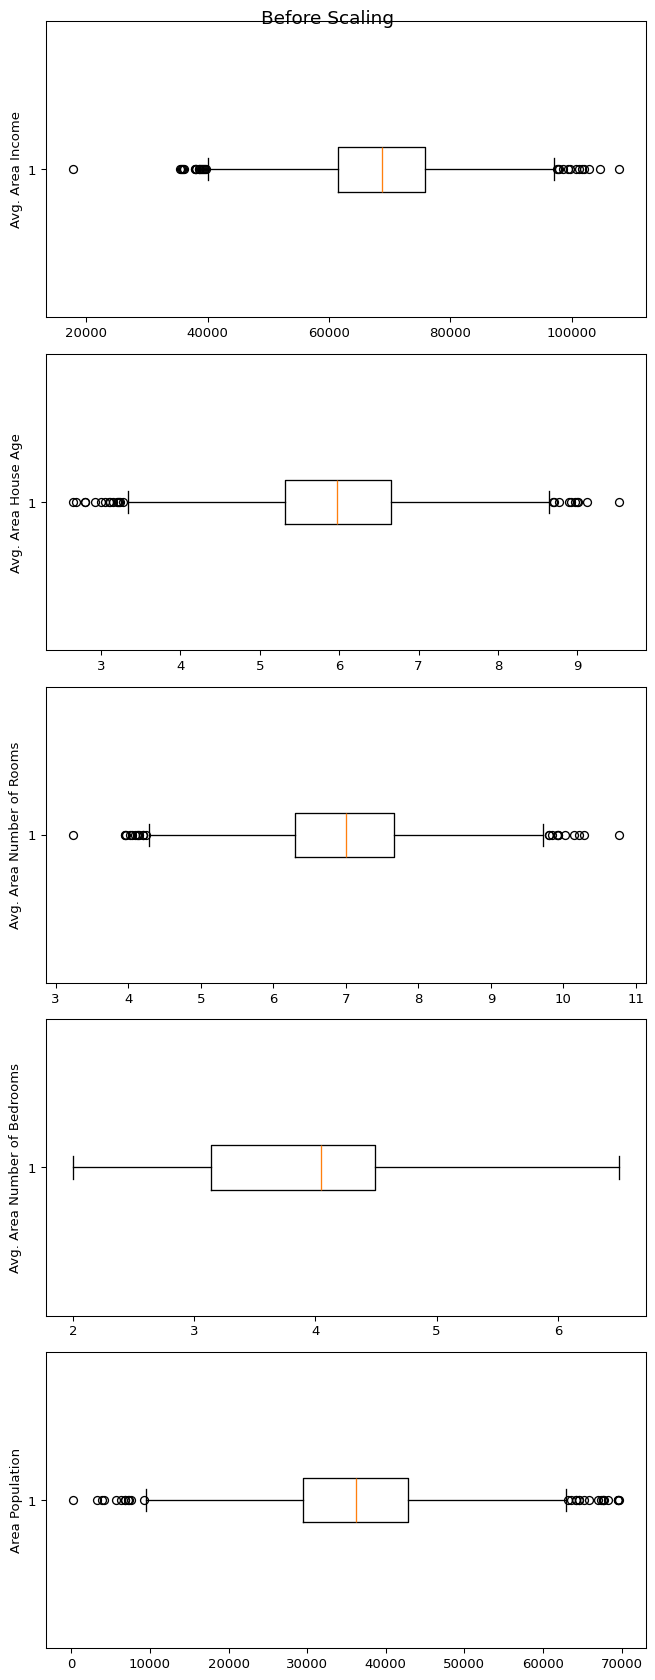

In [20]:
fig, axs = plt.subplots(len(x.columns), 1, figsize=(7, 18), dpi=95)

for i, col in enumerate(x.columns):
    axs[i].boxplot(x[col], vert=False)
    axs[i].set_ylabel(col)

plt.suptitle("Before Scaling", fontsize=14)
plt.tight_layout()
plt.show()


After scaling

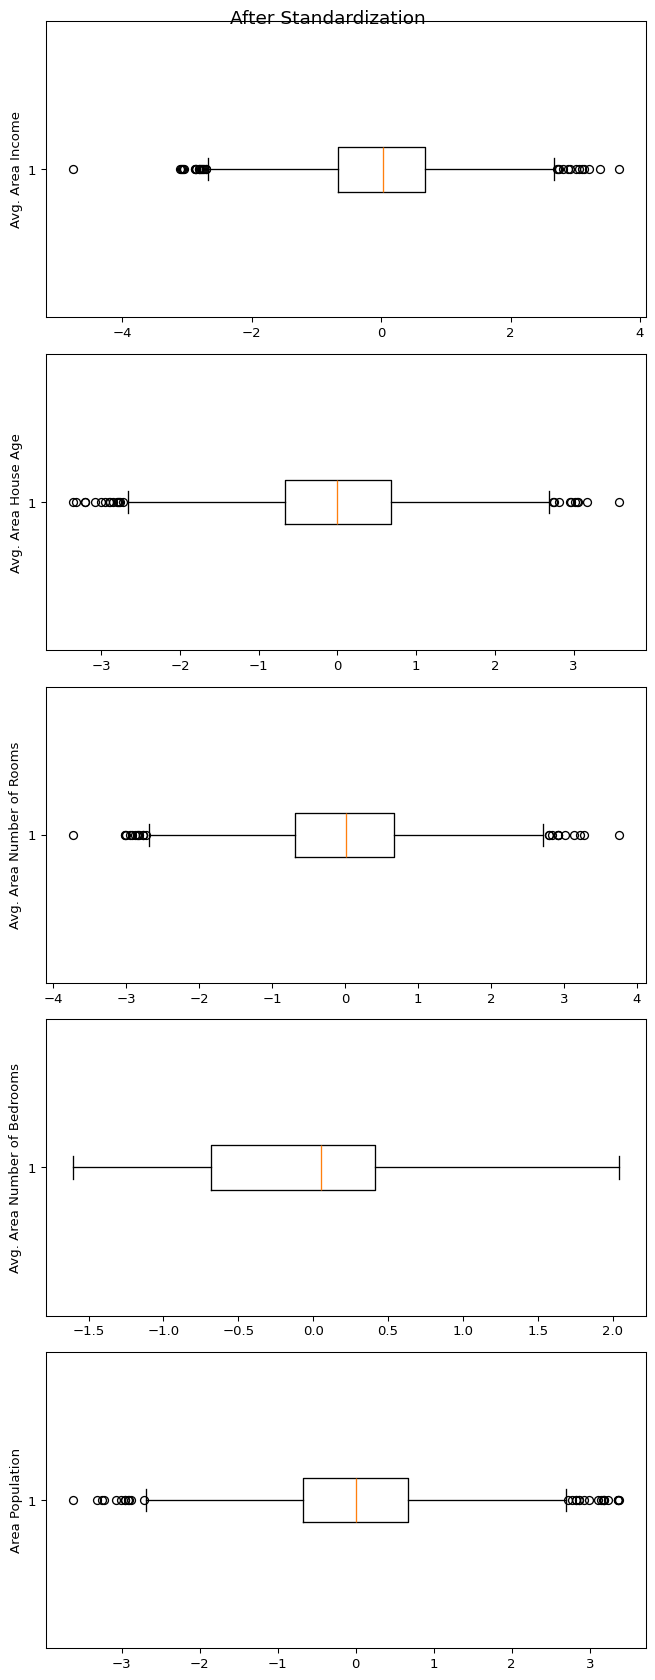

In [21]:
fig, axs = plt.subplots(len(X_scaled.columns), 1, figsize=(7, 18), dpi=95)

for i, col in enumerate(X_scaled.columns):
    axs[i].boxplot(X_scaled[col], vert=False)
    axs[i].set_ylabel(col)

plt.suptitle("After Standardization", fontsize=14)
plt.tight_layout()
plt.show()


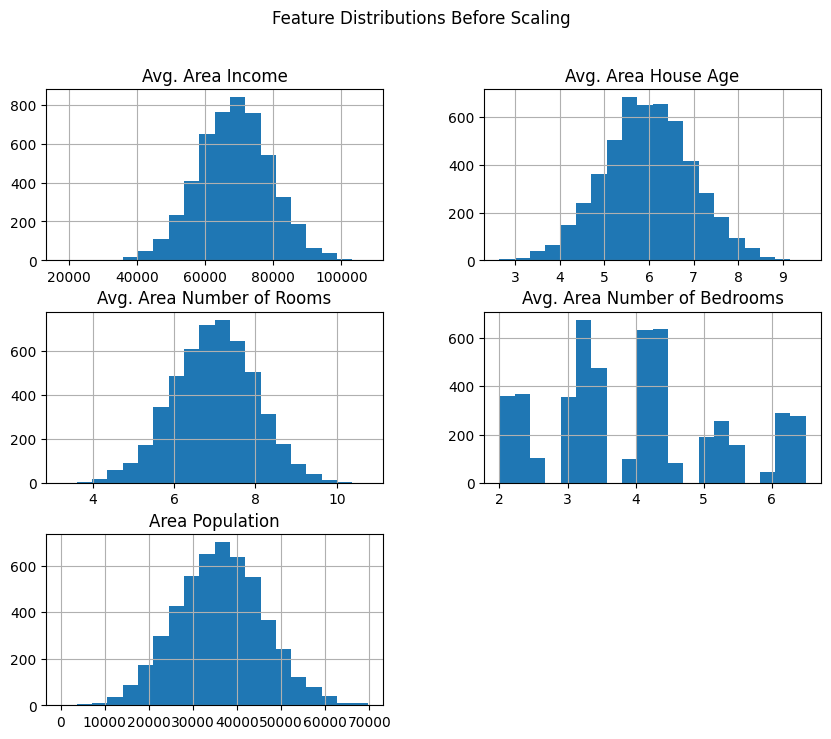

In [22]:
x.hist(figsize=(10, 8), bins=20)
plt.suptitle("Feature Distributions Before Scaling")
plt.show()


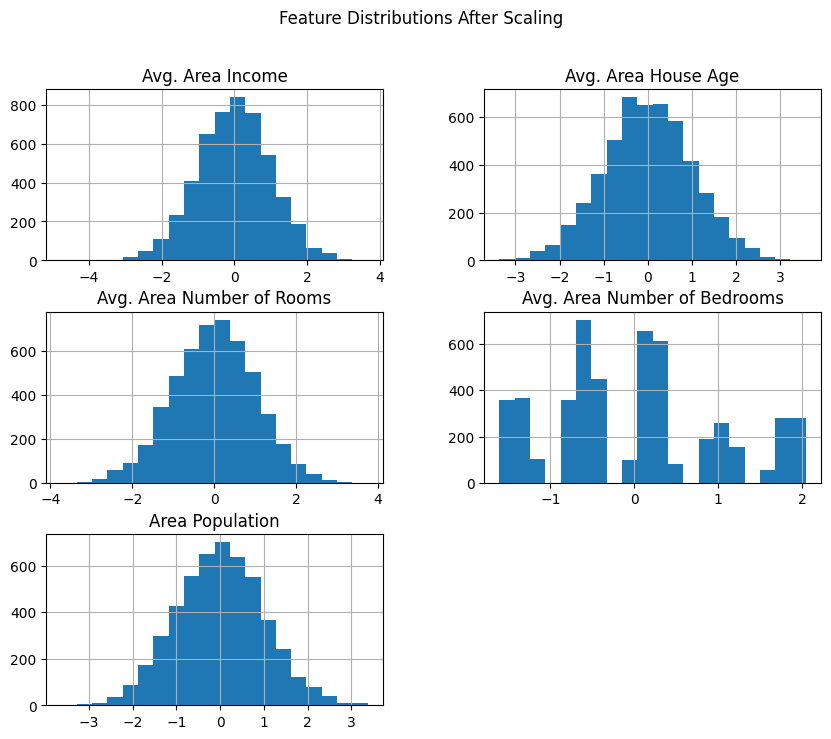

In [23]:
X_scaled.hist(figsize=(10, 8), bins=20)
plt.suptitle("Feature Distributions After Scaling")
plt.show()


Final test: Lab 1 heatmap fail without preprocessing, try now.

<Axes: >

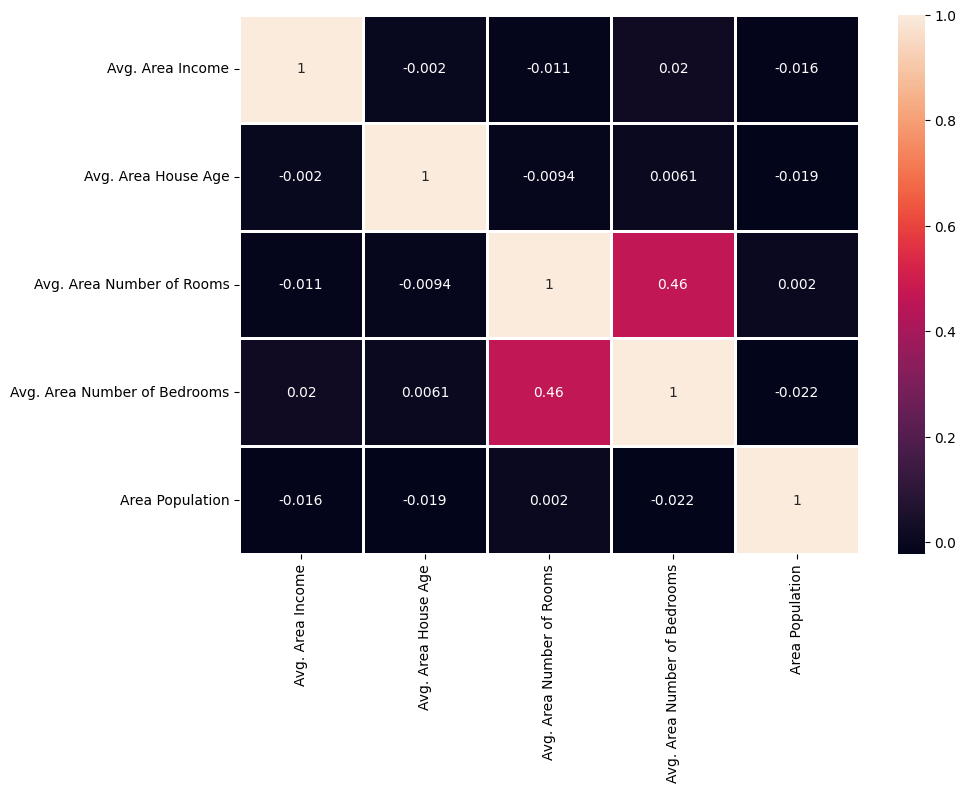

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(x.corr(), annot=True, linewidths=2)

Scatter plot : Avg area income and price correlation.

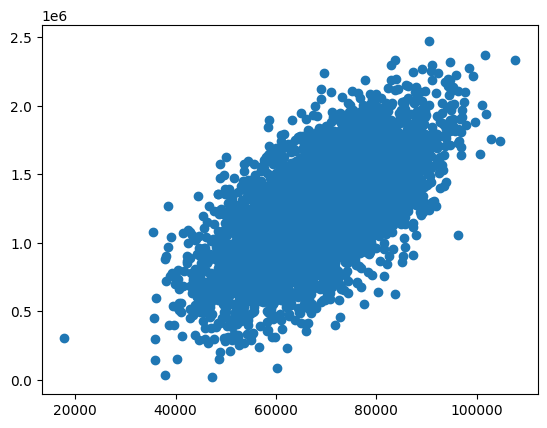

In [28]:
plt.scatter(df['Avg. Area Income'], df['Price'])

#Class task: Features engineering based on **Analytics Vidhya** website shared

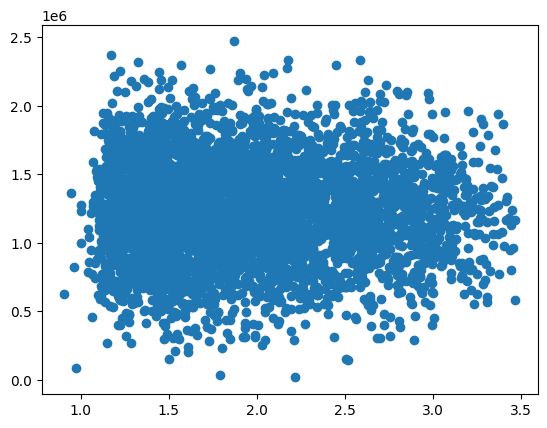

In [33]:
df['Rooms_per_Bedroom'] = df['Avg. Area Number of Rooms'] / df['Avg. Area Number of Bedrooms']
plt.scatter(df['Rooms_per_Bedroom'], df['Price'])